In [1]:
import os
from pathlib import Path
import sys
import numpy as np
import scvelo as scv

In [2]:
notebook_dir = os.getcwd()
notebook_dir

'c:\\Users\\OmerCagatayTalikaci\\Desktop\\github\\STVelo\\notebooks\\analysis\\nuc_cyto_vs_spl_uns'

In [3]:
Path(notebook_dir).parents[3]

WindowsPath('c:/Users/OmerCagatayTalikaci/Desktop/github')

In [3]:
os.chdir(Path(notebook_dir).parents[3])

In [4]:
stvelo_path = os.path.join(os.getcwd(),'STVelo','stvelo')

import sys  
sys.path.insert(1,stvelo_path)

from pipelines.metrics import *

# Read adatas 
- how is velocity_gamma calculated?

In [24]:
adata_folder_path = os.path.join(os.getcwd(), 'data', 'simulated') 

In [25]:
import os
import anndata as ad


# Initialize an empty dictionary to store the AnnData objects
adata_dict = {}

# Loop through all files in the folder
for file_name in os.listdir(adata_folder_path):
    # Check if the file has .h5ad extension
    if file_name.endswith('.h5ad'):
        # Remove the file extension to use as the dictionary key
        key = os.path.splitext(file_name)[0]
        
        # Read the .h5ad file and store it in the dictionary
        adata_dict[key] = scv.read(os.path.join(adata_folder_path, file_name))

# Now, adata_dict contains the .h5ad files with keys as their filenames without extension


# n_obs = 800

In [7]:
adata_800 = {'adata_n_c_800obs_300genes_deterministic': adata_dict['adata_n_c_800obs_300genes_deterministic'].copy(),
             'adata_s_u_800obs_300genes_deterministic': adata_dict['adata_s_u_800obs_300genes_deterministic'].copy()}

In [8]:
adata_n_c_800obs = adata_dict['adata_n_c_800obs_300genes_deterministic'].copy()
adata_s_u_800obs = adata_dict['adata_s_u_800obs_300genes_deterministic'].copy()

In [14]:
import matplotlib.pyplot as plt 

# Metrics 

## Confidence 

In [58]:
for d in adata_800.keys():
    print(d)
    adata_800[d]=compute_confidence(adata_800[d])

adata_n_c_800obs_300genes_deterministic
computing velocity graph (using 2/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:22) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_s_u_800obs_300genes_deterministic
computing velocity graph (using 2/24 cores)
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

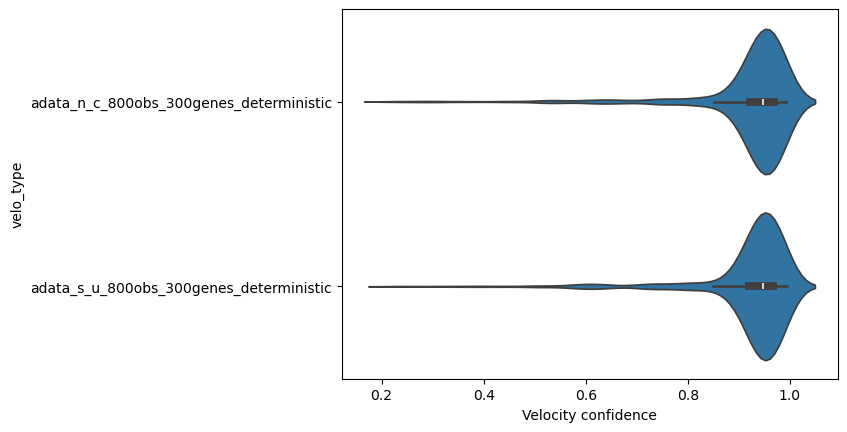

In [59]:
# confidence
import seaborn as sns
confidences=get_confidences(adata_800)
sns.violinplot(data=confidences,x='Velocity confidence',y='velo_type')

In [60]:
velo_mse_bygene=velocity_mean_mse(adata_800,mode='by_gene')
velo_mse_bycell=velocity_mean_mse(adata_800,mode='by_cell')

In [63]:
adata_800

{'adata_n_c_800obs_300genes_deterministic': AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'velocity_umap'
     varm: 'PCs'
     layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity'
     obsp: 'connectivities', 'distances',
 'adata_s_u_800obs_300genes_deterministic': AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 't

In [65]:
velocity_correlation_by_gene=velocity_corr_against_reference(adata_800,reference='adata_s_u_800obs_300genes_deterministic', mode= 'by_gene')
velocity_correlation_by_cell=velocity_corr_against_reference(adata_800,reference='adata_s_u_800obs_300genes_deterministic', mode= 'by_cell')

Text(0.5, 0, 'Correlation against reference')

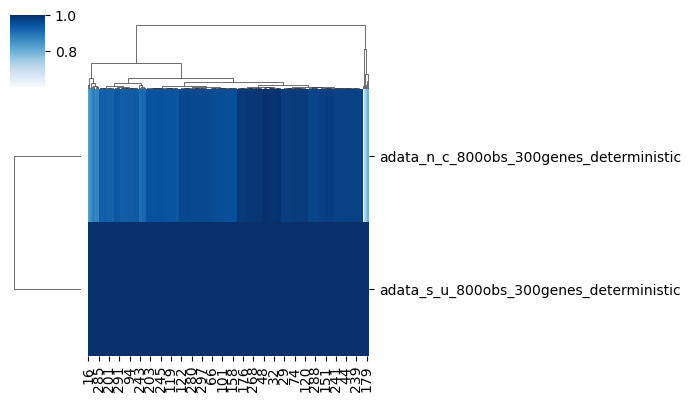

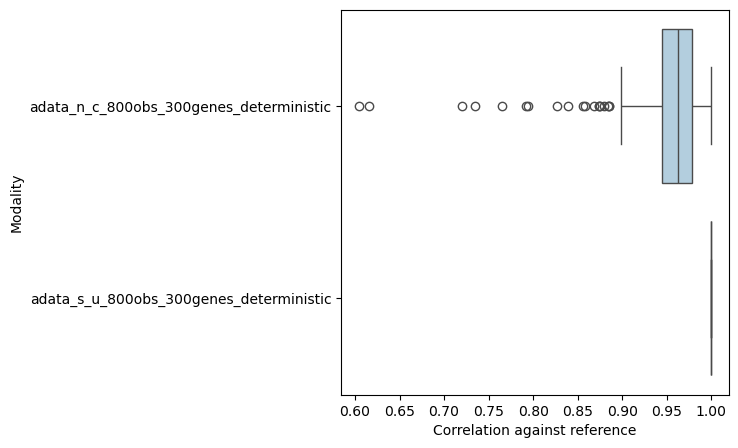

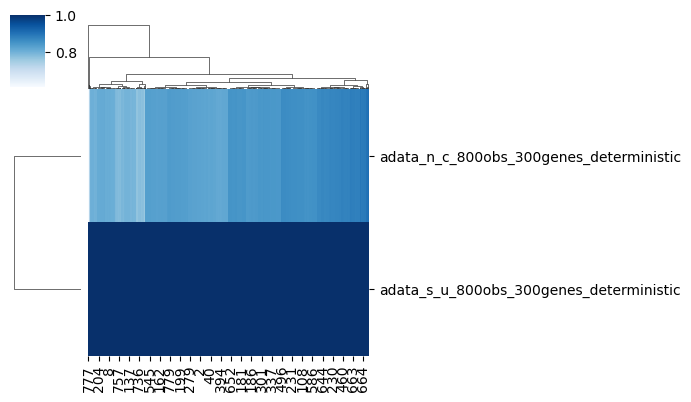

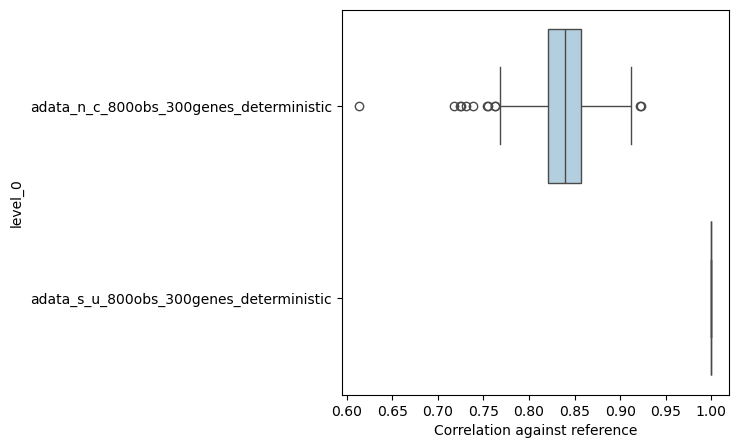

In [71]:
# velocity corr against a reference 
import matplotlib.pyplot as plt
sns.clustermap(velocity_correlation_by_gene.fillna(0),figsize=(7,4),cmap='Blues')
plt.figure(figsize=(5,5))
sns.boxplot(data=velocity_correlation_by_gene.stack().reset_index(),y='level_0',x=0,palette='Blues')
plt.xlabel('Correlation against reference')
plt.ylabel('Modality')

# same, but by cell
import matplotlib.pyplot as plt
sns.clustermap(velocity_correlation_by_cell.fillna(0),figsize=(7,4),cmap='Blues')
plt.figure(figsize=(5,5))
sns.boxplot(data=velocity_correlation_by_cell.stack().reset_index(),y='level_0',x=0,palette='Blues')
plt.xlabel('Correlation against reference')

In [74]:
velocity_correlation_by_gene['']

,adata_n_c_800obs_300genes_deterministic,adata_s_u_800obs_300genes_deterministic
0,0.973094,1.0
1,0.974257,1.0
2,0.928570,1.0
3,0.983103,1.0
4,0.981479,1.0
...,...,...
295,0.943085,1.0
296,0.956619,1.0
297,0.960084,1.0
298,0.960831,1.0


In [77]:
# shuffle the gene counts for s and u, create new expression metrics to put in X.   
adata_n_c_800obs.layers['spliced'].shape

(800, 300)

In [79]:
adata_800['adata_n_c_800obs_300genes_deterministic'].obs

,true_t,n_counts,leiden,velocity_self_transition,velocity_length,velocity_confidence,velocity_confidence_transition,Velocity confidence
0,0.00,1391.017318,6,0.138416,374.660004,0.634852,0.700559,0.634852
1,0.00,1253.769123,0,0.082973,294.149994,0.748571,0.722695,0.748571
2,0.01,1121.685710,5,0.092543,451.809998,0.841626,0.741384,0.841626
3,0.03,1490.961282,5,0.081255,374.390015,0.832352,0.744265,0.832352
4,0.06,1568.837973,4,0.085347,549.109985,0.924803,0.700988,0.924803
...,...,...,...,...,...,...,...,...
795,19.92,1333.223887,0,0.032342,243.259995,0.768539,0.785573,0.768539
796,19.95,1549.303146,5,0.076839,406.059998,0.874119,0.762933,0.874119
797,19.98,1376.844460,0,0.706672,193.119995,0.630991,-0.048761,0.630991
798,19.99,1307.619244,5,0.036613,458.549988,0.923935,0.786841,0.923935


In [80]:
adata_800['adata_n_c_800obs_300genes_deterministic'].var

,true_t_,true_alpha,true_beta,true_nu,true_gamma,true_scaling,n_cells,velocity_gamma,velocity_qreg_ratio,velocity_r2,velocity_genes
0,9.222708,228.020484,4.751104,2.520595,1.066855,1.0,620,0.643608,0.643608,0.762868,True
1,11.693030,107.247751,2.180548,0.721779,2.390801,1.0,711,4.377196,4.377196,0.860070,True
2,10.011994,95.111711,5.710098,0.572003,3.267509,1.0,699,6.325608,6.325608,0.957981,True
3,9.146825,298.256967,7.771654,3.141301,0.688013,1.0,601,0.312933,0.312933,0.611592,True
4,7.316382,97.485642,3.998943,2.434922,0.768762,1.0,568,0.515067,0.515067,0.621103,True
...,...,...,...,...,...,...,...,...,...,...,...
295,4.339840,100.280564,2.849259,1.239571,1.686955,1.0,569,1.958577,1.958577,0.787063,True
296,2.458263,208.065465,3.848041,1.005090,2.253743,1.0,499,3.508105,3.508105,0.736235,True
297,13.908059,387.996694,6.758789,1.622955,1.787297,1.0,709,1.376019,1.376019,0.676072,True
298,15.580945,162.799459,4.909799,1.660227,1.594625,1.0,751,1.298080,1.298080,-0.019501,False


In [66]:
velocity_correlation_by_gene

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
adata_n_c_800obs_300genes_deterministic,0.973094,0.974257,0.92857,0.983103,0.981479,0.98176,0.961962,0.94656,0.96529,0.934783,...,0.991135,0.939999,0.975826,0.95327,0.984799,0.943085,0.956619,0.960084,0.960831,0.972002
adata_s_u_800obs_300genes_deterministic,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
velo_mse_bycell

,adata_n_c_800obs_300genes_deterministic,adata_s_u_800obs_300genes_deterministic
adata_n_c_800obs_300genes_deterministic,0.000000,473.847046
adata_s_u_800obs_300genes_deterministic,473.847046,0.000000


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


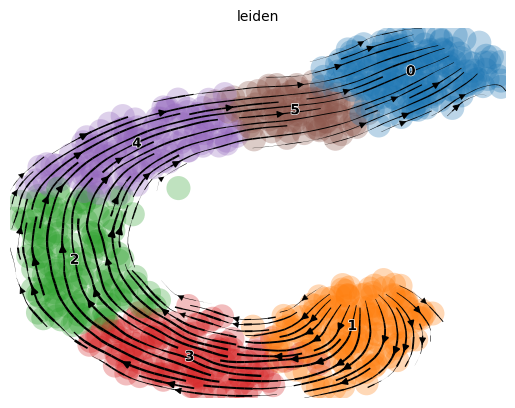

In [12]:
scv.pl.velocity_embedding_stream(adata_s_u_800obs, basis='umap', color='leiden')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


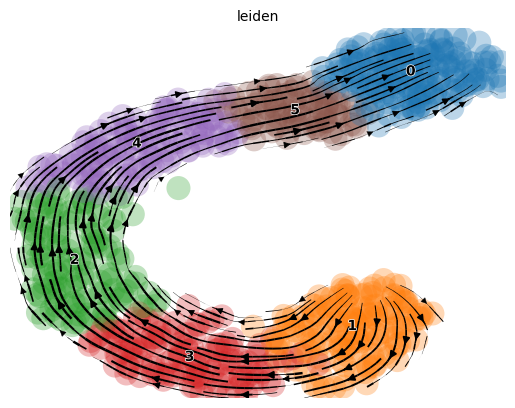

In [13]:
scv.pl.velocity_embedding_stream(adata_n_c_800obs, basis='umap', color='leiden')

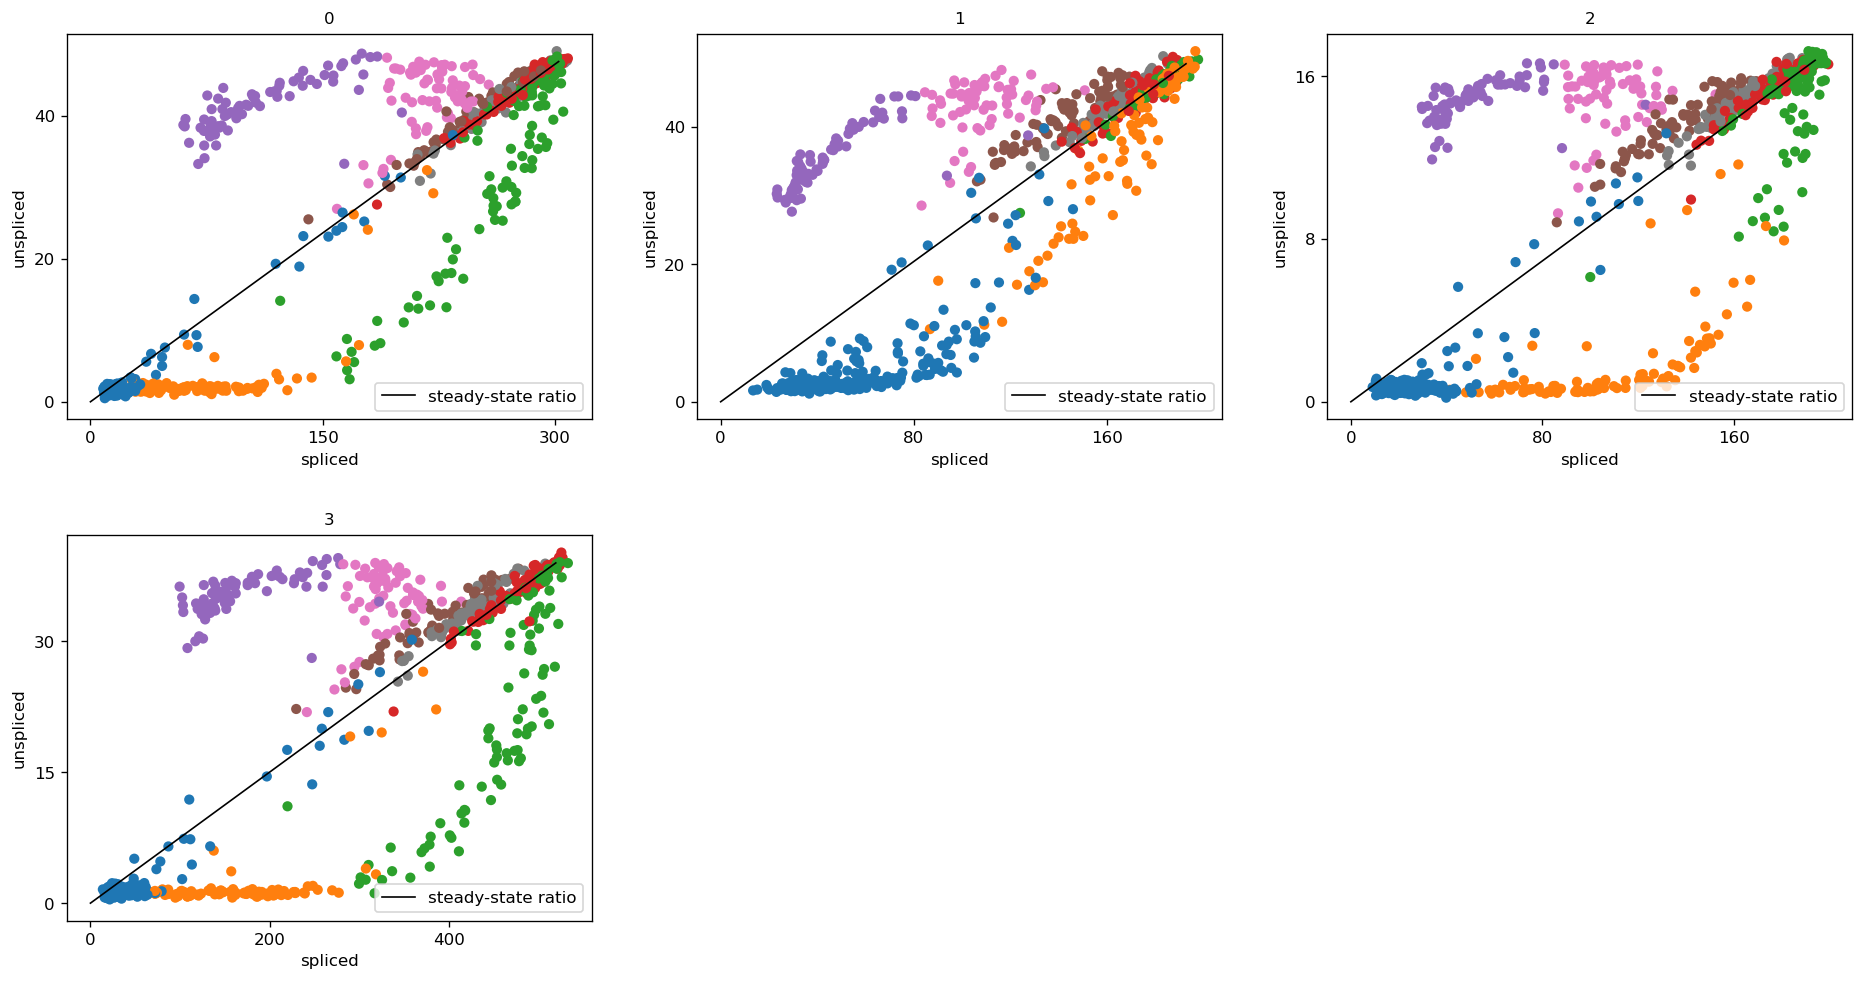

In [34]:
scv.pl.scatter(adata_s_u_800obs,color="leiden", basis=['0','1','2','3'], ncols=3, frameon=True,dpi=120)

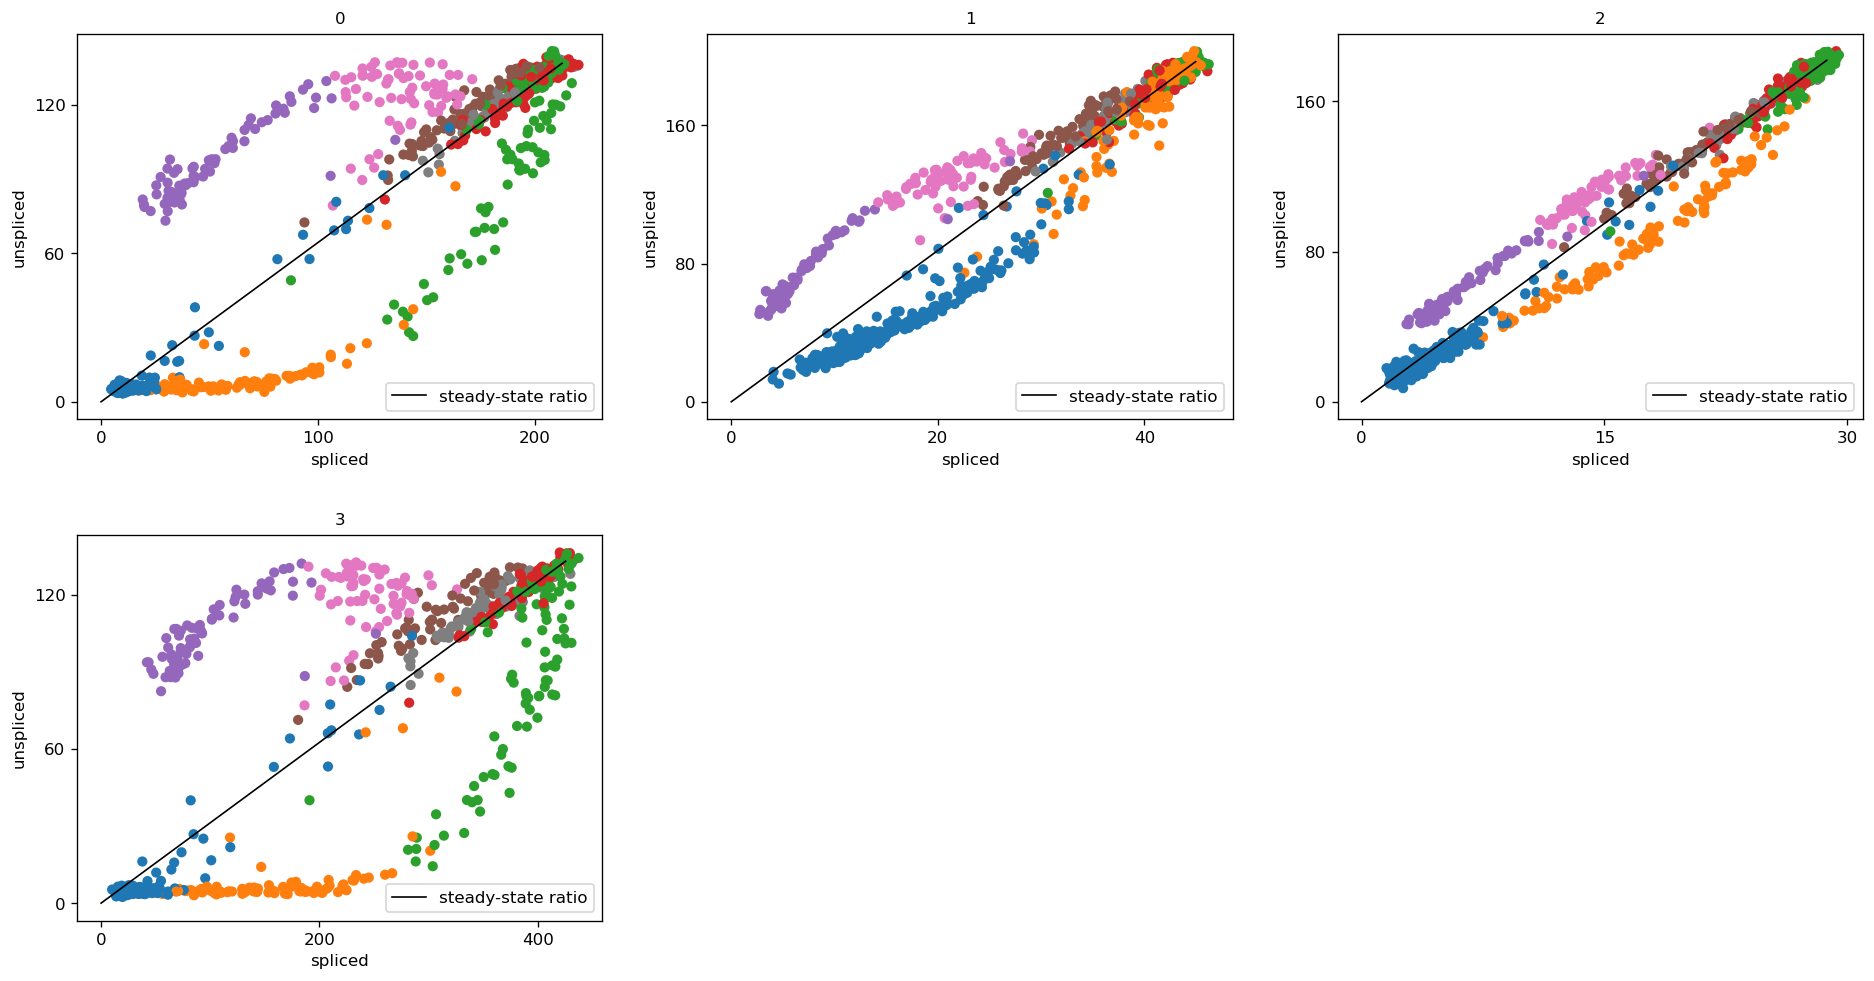

In [37]:
scv.pl.scatter(adata_n_c_800obs,color="leiden", basis=['0','1','2','3'], ncols=3, frameon=True,dpi=120)

# Check the important genes 

In [38]:
scv.tl.rank_velocity_genes(adata_s_u_800obs, groupby='leiden', min_corr=.3)
scv.tl.rank_velocity_genes(adata_n_c_800obs, groupby='leiden', min_corr=.3)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [47]:
dfs = scv.get_df(adata_s_u_800obs.uns['rank_velocity_genes']['names'])
dfs.head(5)

,0,1,2,3,4,5,6,7
0,146,146,233,214,299,174,174,168
1,214,214,146,262,119,168,264,112
2,16,16,262,16,178,264,124,214
3,79,262,79,97,160,246,246,128
4,262,79,243,24,93,124,112,124


In [48]:
dfn = scv.get_df(adata_n_c_800obs.uns['rank_velocity_genes']['names'])
dfn.head(5)

,0,1,2,3,4,5,6,7
0,126,126,233,58,299,58,61,58
1,233,205,205,171,194,112,193,246
2,255,233,261,156,72,124,231,124
3,243,291,126,102,114,246,112,25
4,146,255,296,179,111,156,246,242


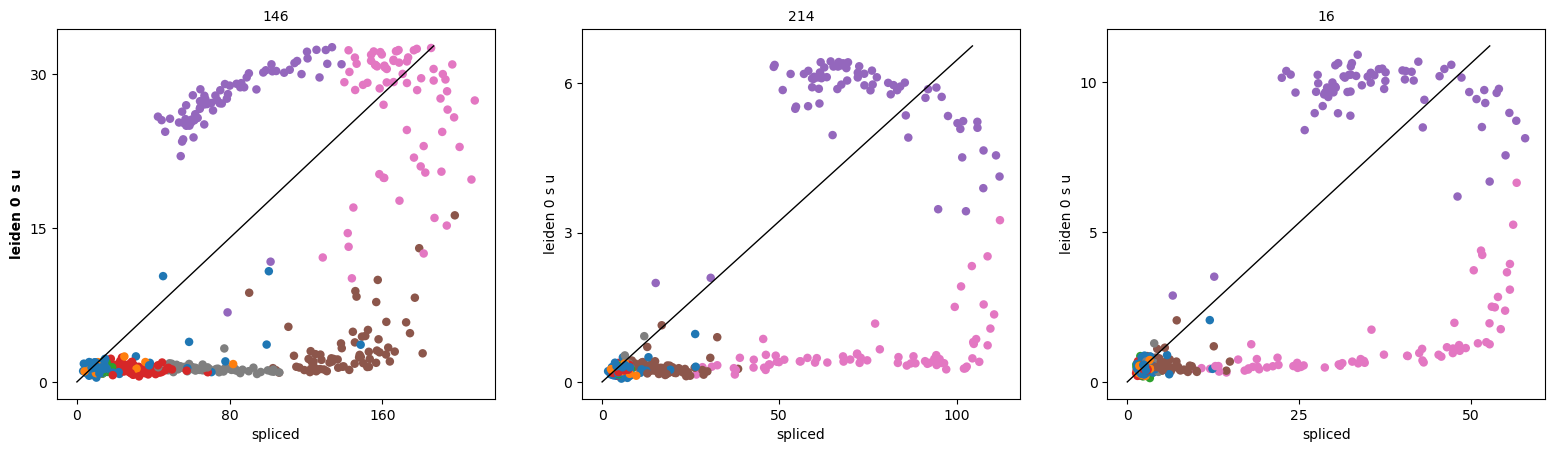

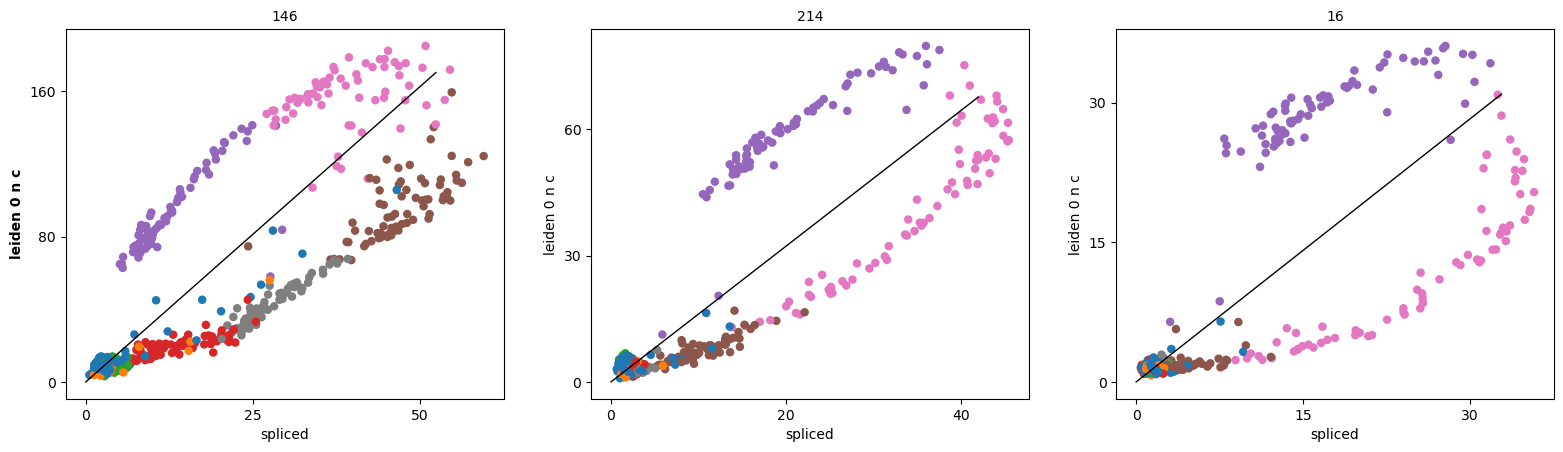

In [50]:
scv.pl.scatter(adata_s_u_800obs, dfs['0'][:3], ylabel='leiden 0 s_u', color='leiden')
scv.pl.scatter(adata_n_c_800obs, dfs['0'][:3], ylabel='leiden 0 n_c', color= 'leiden')

In [51]:
adata_n_c_800obs

AnnData object with n_obs × n_vars = 800 × 300
    obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'spearmans_score', 'velocity_score'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'leiden_colors', 'rank_velocity_genes'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity'
    obsp: 'connectivities', 'distances'

# Velocity Confidence

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


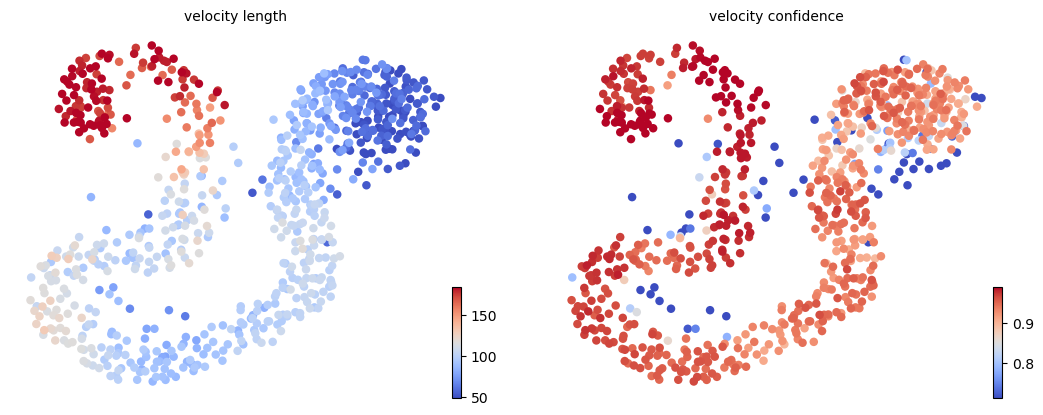

In [52]:
scv.tl.velocity_confidence(adata_s_u_800obs)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata_s_u_800obs, c=keys, cmap='coolwarm', perc=[5, 95])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


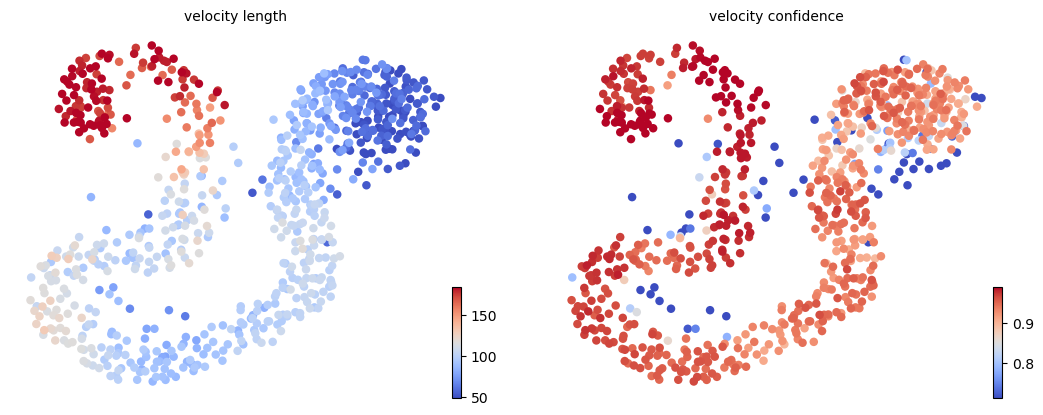

In [53]:
scv.tl.velocity_confidence(adata_n_c_800obs)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata_s_u_800obs, c=keys, cmap='coolwarm', perc=[5, 95])

In [55]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_s_u_800obs.obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2,3,4,5,6,7
velocity_length,60.608391,92.606468,100.600739,93.646950,179.986191,102.665283,154.999863,110.392792
velocity_confidence,0.882886,0.901795,0.932575,0.927550,0.967294,0.917832,0.957479,0.942162


In [57]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_n_c_800obs.obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2,3,4,5,6,7
velocity_length,251.146912,345.422638,344.594849,307.391632,491.050995,390.121857,536.619568,327.507355
velocity_confidence,0.875041,0.911013,0.939164,0.924289,0.968997,0.925864,0.959924,0.937161
